## bmi 데이터를 활용하여 머신러닝의 전체 과정을 이해하자

#### 머신러닝의 7과정
1. 문제 정의
2. 데이터 수집(File, Survey, Database, IoT Sensor)
3. 데이터 전처리
   - 결측치, 이상치, 특성공학(Scaling, Encoding, Binning, Transform)
5. 탐색적 데이터 분석
   - 기술통계량, 시각화
6. Model선택, Hyper Parameter 조정
7. Model 학습(fit)
8. Model 평가(Evaluat

In [99]:
import pandas as pd

In [100]:
read=pd.read_csv('./data/bmi_500.csv',encoding='utf-8')

In [101]:
read

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


#### 1. 문제정의 (목표)
- 500명의 키와 몸무게, 비만도 레이블을 이용해서 비만 정도를 판단하는 모델을 만들어보자!

### 2. 데이터 수집
- csv파일 로드

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [103]:
tbl=pd.read_csv('./data/bmi_500.csv',encoding='utf-8',index_col="Label")
tbl

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


### 3.데이터 전처리
 -전처리가 필요없는 학습용 데이터

### 4. 데이터의 특성 파악

In [104]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [105]:
tbl["Height"].value_counts()

Height
188    15
179    14
187    14
178    13
168    13
182    12
184    12
172    12
185    11
181    11
150    11
183    11
165    10
195    10
157    10
153    10
154    10
169    10
167     9
145     9
161     9
166     9
164     9
177     9
146     9
142     9
159     9
190     9
162     9
186     9
141     8
152     8
151     8
140     8
171     8
180     8
163     8
174     8
191     7
147     7
176     7
197     7
160     7
192     6
155     6
196     6
156     6
170     6
158     5
144     5
189     5
149     5
148     5
198     5
193     5
194     5
175     4
173     4
143     3
199     3
Name: count, dtype: int64

In [106]:
tbl["Gender"].value_counts()

Gender
Female    255
Male      245
Name: count, dtype: int64

In [107]:
## 기술통계치 확인(수치형,문자형 데이터가 썪여있을 경우,수치형 데이터 자료)
tbl.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [108]:
#인덱스
tbl.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [109]:
# bmi 지수가 extreme obesity인사람의수는?
tbl.loc['Extreme Obesity'].shape

(198, 3)

In [110]:
tbl.index.value_counts()

Label
Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: count, dtype: int64

### 산점도 그래프로 전체데이터 시각화

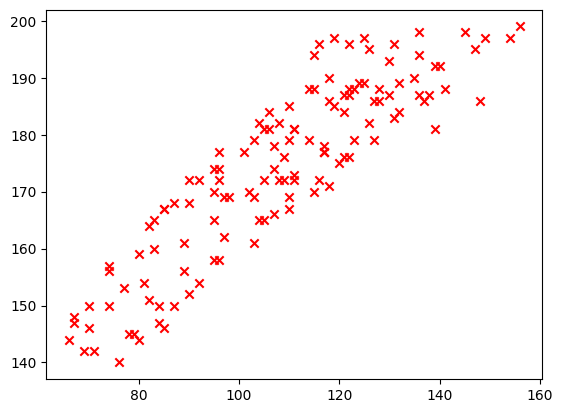

In [147]:
con=tbl.loc["Obesity"]
con
plt.scatter(con["Weight"],con["Height"],color="red",marker="x")


In [ ]:
# bmi obesity 등급만 산정도 시각화 해보기

In [ ]:
### 비만도 등급 별로 시각화 하기


def myScatter(name,color):
    tmp=tbl.loc[name]
    plt.scatter(tmp["Weight"],tmp["Height"],c=color,label=name)
   

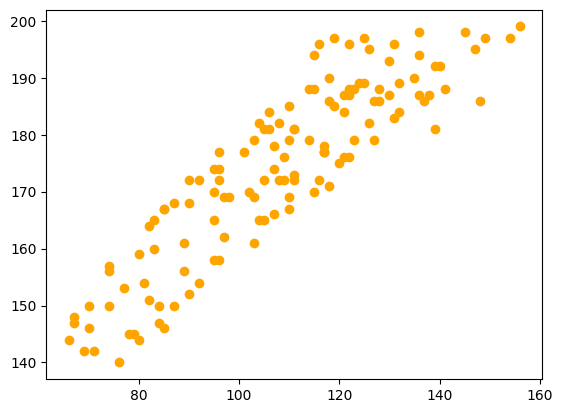

In [ ]:
myScatter('Obesity',"orange")

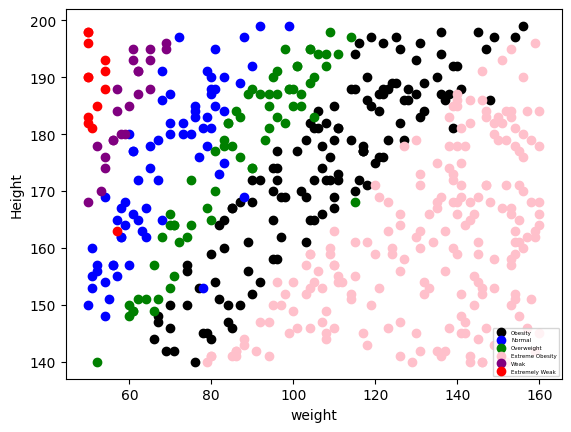

In [ ]:

myScatter("Obesity","black")
myScatter("Normal","blue")
myScatter("Overweight","green")
myScatter("Extreme Obesity","pink")
myScatter("Weak","purple")
myScatter("Extremely Weak","red")
plt.xlabel("weight")
plt.ylabel("Height")
plt.legend( loc = 'lower right',prop={"size":4})
plt.show()

### 5. 모델링(모델 선택, 학습, 평가)

- 1. 문제데이터 정답데이터 분리(x,y)
- 2. train,test 셋분리
- 3. 모델생성
- 4. 학습 및 평가
- 5. 하이퍼 파라미터 조정 평가

In [139]:
from sklearn.model_selection import train_test_split
data=pd.read_csv('./data/bmi_500.csv',encoding='utf-8')
import numpy as np
# np.random.seed(42)
# ran=np.arange(500)
# np.random.shuffle(ran)
# 문제 데이터 x와 정답 y로 분류
x=data.loc[:,"Height":"Weight"]
y=data.loc[:,"Label"]
# x=x.iloc[ran]
# y=y.iloc[ran]

# x_train=x.iloc[:350,:]
# y_train=y.iloc[:350]
# x_test=x.iloc[350:,:]
# y_test=y.iloc[350:]
train_x,test_x,train_y,test_y=train_test_split(x.loc[:,:],y.loc[:],test_size=0.3,random_state=40)
#KNeighborsClassifier.fit(train_x,train_y)
# n_neigbors 값은 전체 학습 데이터수의 제곱근 값을 먼저 기준을 잡기
knn_model=KNeighborsClassifier(n_neighbors=10)

In [140]:
# 모델 학습 시키ㅣ
knn_model.fit(train_x,train_y)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [141]:
knn_model.score(test_x,test_y)

0.9266666666666666

In [142]:
knn_model.predict([[173,67]])

/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)

In [143]:
pred=knn_model.predict(test_x)

In [144]:
metrics.accuracy_score(pred,test_y)

0.9266666666666666

In [145]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred))

                 precision    recall  f1-score   support

Extreme Obesity       0.97      0.95      0.96        63
 Extremely Weak       1.00      1.00      1.00         3
         Normal       0.87      0.95      0.91        21
        Obesity       0.86      0.94      0.90        34
     Overweight       0.95      0.83      0.89        24
           Weak       1.00      0.80      0.89         5

       accuracy                           0.93       150
      macro avg       0.94      0.91      0.92       150
   weighted avg       0.93      0.93      0.93       150



In [ ]:
# precision: 정밀도 ,모델이 * 이라고 예측한 것 중에서 , 실제로도 *인 비율
# recall: 재현율
# weak 정밀도 1.00 모델이 저체중이라고 예측한 것 중에, 실제로도 저체중인 경우
# weak 재현율 0.64 실제로 저체중인데. 모델이 저체중이라고 예측한 비율

# 정밀도: 가짜를 진짜로 착각하는건 안되는 경우 ! 중요
# 재현율: 진짜를 가짜로 착하는 안되는 경우! 중요

# 정상이지만, 저체중 으로 잘못 판명나는 경우
# 실제 저체중 이지만, 정상이라고 잘못 판명나는 경우
# 재현율이 더 중요함.

### 학습된 모델에 내 키와 몸무게를 넣어서 결과를 확인해보자


In [146]:
my_info=pd.DataFrame([[173,67]],columns=["Height","Weight"])
my_info

,Height,Weight
0,173,67


##### 
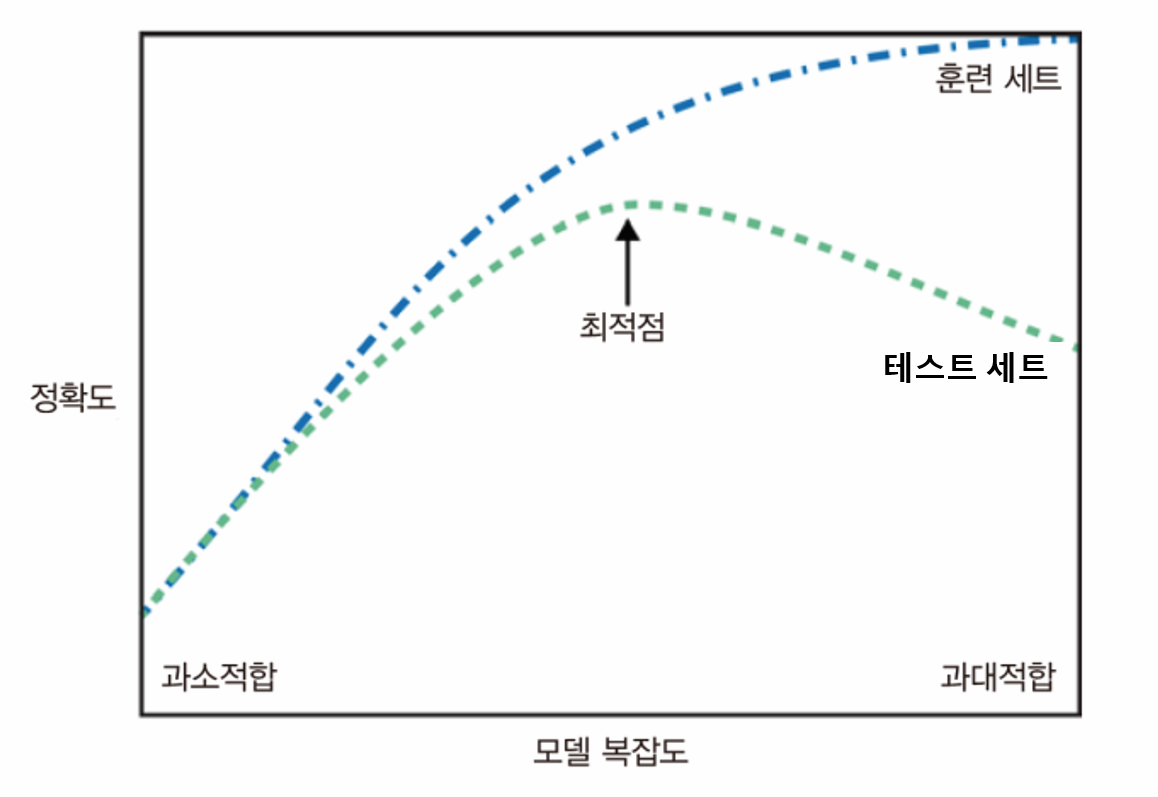

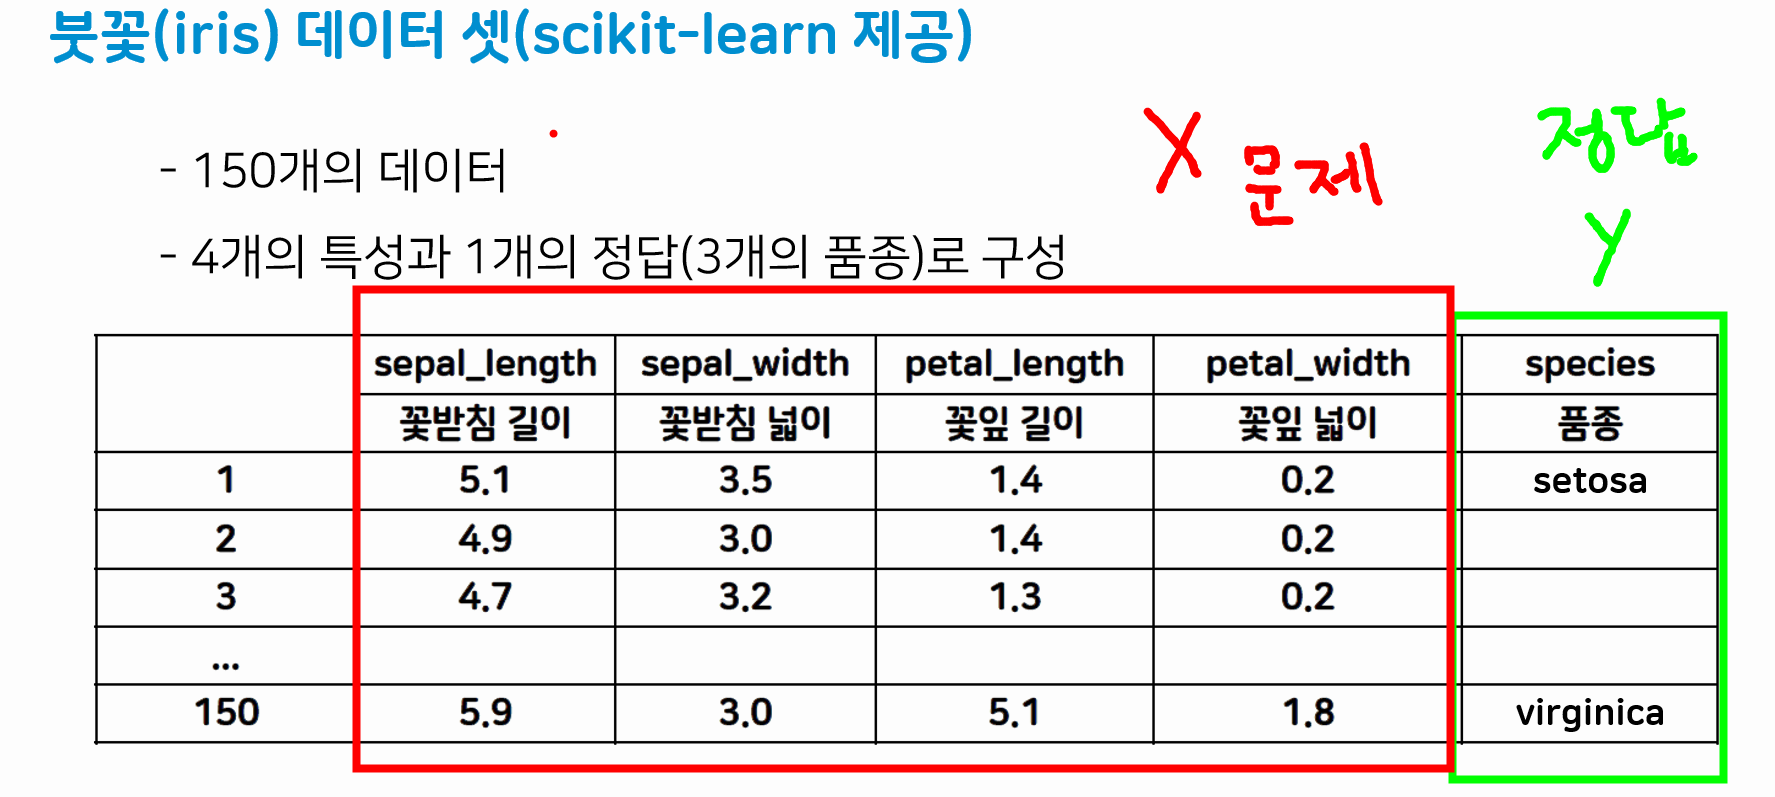